<h1 style="text-align:center">Build and Evaluate Unsupervised Learning Models</h1>
<h2 style="text-align:center">Applied Question 7</h2>
<p style="text-align:center">Robert Evans</p>
<p style="text-align:center">School of Technology & Engineering, National University</p>
<p style="text-align:center">DDS-8555: Predictive Analysis</p>
<p style="text-align:center">Dr. Mohammad Yavarimanesh</p>
<p style="text-align:center">February 23, 2025</p>

## Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.cluster.hierarchy import set_link_color_palette
from statsmodels.datasets import get_rdataset

## Load Data

In [2]:
USArrests = get_rdataset('USArrests').data

In [3]:
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Part A

In [5]:
linkage_matrix = linkage(USArrests, method='complete', metric='euclidean')

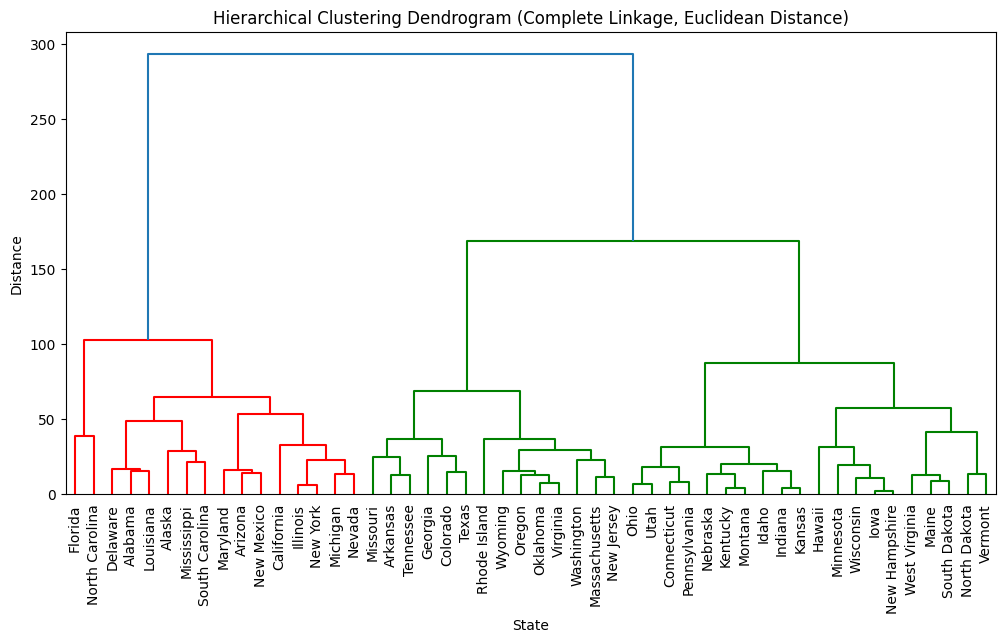

In [21]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=USArrests.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage, Euclidean Distance)")
plt.xlabel("State")
plt.ylabel("Distance")
plt.show()

## Part B

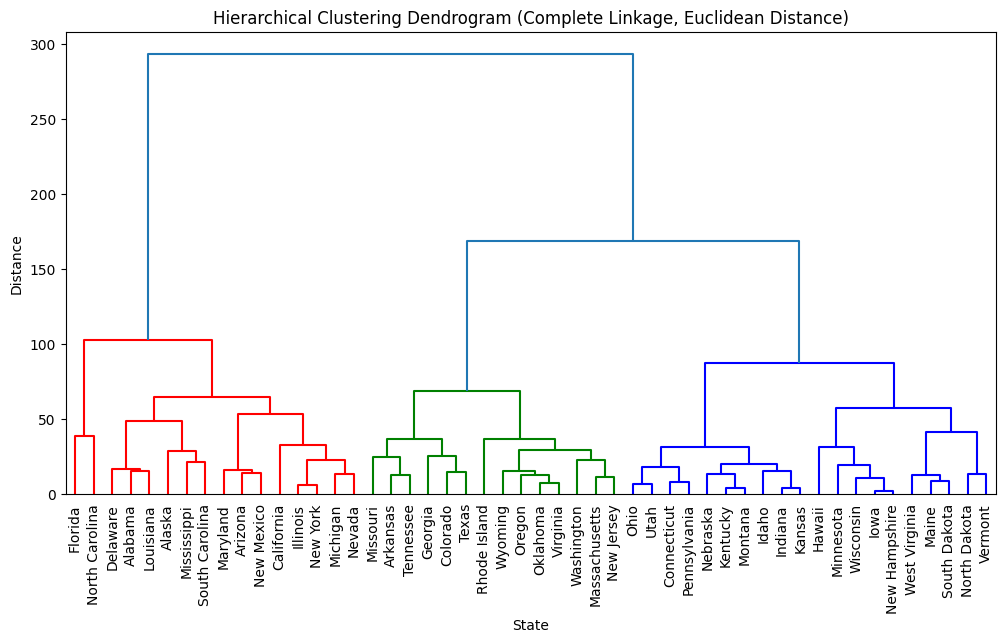

In [22]:
# Cut the dendrogram to obtain exactly three clusters
cluster_labels = fcluster(linkage_matrix, 3, criterion='maxclust')
USArrests['Cluster'] = cluster_labels

# Define colors for clusters
set_link_color_palette(['r', 'g', 'b'])

# Plot the dendrogram with colors
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=USArrests.index, leaf_rotation=90, leaf_font_size=10, color_threshold=linkage_matrix[-2, 2])
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage, Euclidean Distance)")
plt.xlabel("State")
plt.ylabel("Distance")
plt.show()


In [26]:
# Create a DataFrame to show clusters as column headers with states listed below
cluster_dict = {f"Cluster {i}": USArrests[USArrests['Cluster'] == i].index.tolist() for i in range(1, 4)}
cluster_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster_dict.items()])).fillna('')

# Display cluster assignments
print(cluster_df.to_string(index=False))


     Cluster 1     Cluster 2     Cluster 3
       Alabama      Arkansas   Connecticut
        Alaska      Colorado        Hawaii
       Arizona       Georgia         Idaho
    California Massachusetts       Indiana
      Delaware      Missouri          Iowa
       Florida    New Jersey        Kansas
      Illinois      Oklahoma      Kentucky
     Louisiana        Oregon         Maine
      Maryland  Rhode Island     Minnesota
      Michigan     Tennessee       Montana
   Mississippi         Texas      Nebraska
        Nevada      Virginia New Hampshire
    New Mexico    Washington  North Dakota
      New York       Wyoming          Ohio
North Carolina                Pennsylvania
South Carolina                South Dakota
                                      Utah
                                   Vermont
                             West Virginia
                                 Wisconsin


## Part C

In [27]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(USArrests)

In [34]:
# Perform hierarchical clustering using complete linkage and Euclidean distance
linkage_matrix = linkage(df_scaled, method='complete', metric='euclidean')

In [36]:
# Cut the dendrogram to obtain exactly three clusters
cluster_labels = fcluster(linkage_matrix, 3, criterion='maxclust')
USArrests['Cluster'] = cluster_labels

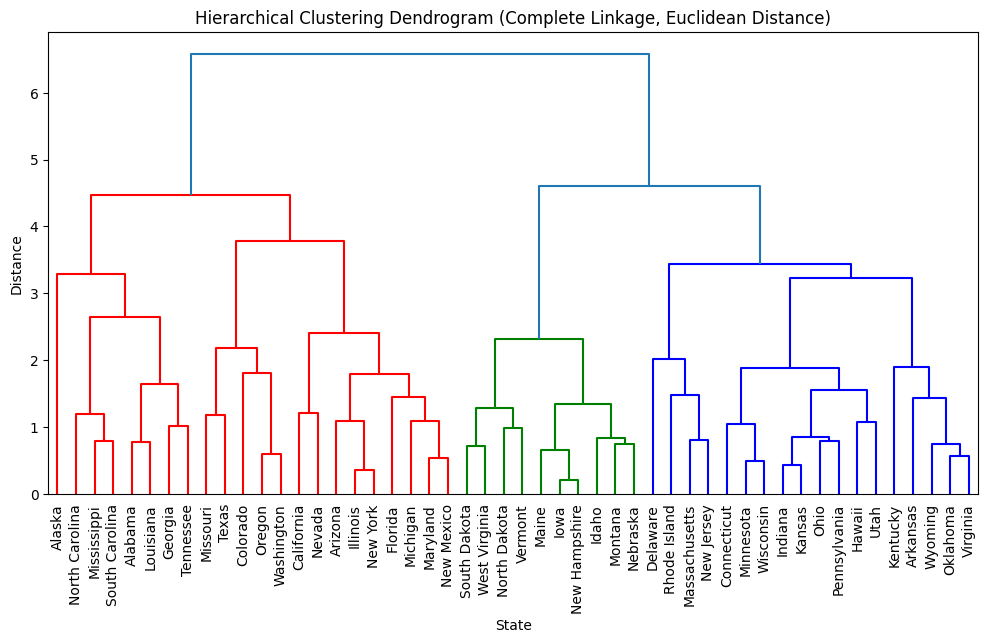

     Cluster 1     Cluster 2     Cluster 3
       Alabama         Idaho      Arkansas
        Alaska          Iowa   Connecticut
       Arizona         Maine      Delaware
    California       Montana        Hawaii
      Colorado      Nebraska       Indiana
       Florida New Hampshire        Kansas
       Georgia  North Dakota      Kentucky
      Illinois  South Dakota Massachusetts
     Louisiana       Vermont     Minnesota
      Maryland West Virginia    New Jersey
      Michigan                        Ohio
   Mississippi                    Oklahoma
      Missouri                Pennsylvania
        Nevada                Rhode Island
    New Mexico                        Utah
      New York                    Virginia
North Carolina                   Wisconsin
        Oregon                     Wyoming
South Carolina                            
     Tennessee                            
         Texas                            
    Washington                            


In [38]:
# Define colors for clusters
set_link_color_palette(['r', 'g', 'b'])

# Plot the dendrogram with colors
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=USArrests.index, leaf_rotation=90, leaf_font_size=10, color_threshold=linkage_matrix[-2, 2])
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage, Euclidean Distance)")
plt.xlabel("State")
plt.ylabel("Distance")
plt.show()

# Create a DataFrame to show clusters as column headers with states listed below
cluster_dict = {f"Cluster {i}": USArrests[USArrests['Cluster'] == i].index.tolist() for i in range(1, 4)}
cluster_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster_dict.items()])).fillna('')

# Display cluster assignments without printing the index
print(cluster_df.to_string(index=False))